In [8]:
for i in range(0, 27, 1):
    filename = (str(i) + ".inp")
    target = open(filename, 'w+')
    pos_a = 0.195 * i * (1 / 25)
    pos_b = 0.305 * i * (1 / 25)
    target.write("""include /home/ben/Documents/na3ocl_project/gulp_calcs/data/na3ocl_structure.inp
""")
    target.write(f"centre 0.5 0.25 0.25")
    target.write("""
size 12 16
vacancy 0.5 0.5 0.0
vacancy 0.5 0.0 0.5
""")
    target.write(f"intersitial Na 0.5 {pos_a:.16f} {0.5 - pos_b:.16f} fix")
    target.write("""
include /home/ben/Documents/na3ocl_project/gulp_calcs/data/na3ocl_khandy_potentials.inp    
""")

In [9]:
for i in range(25, 52, 1):
    filename = (str(i) + ".inp")
    target = open(filename, 'w+')
    pos_a = 0.195 * (i - 25) * (1 / 25)
    pos_b = 0.305 * (i - 25) * (1 / 25)
    target.write("""include /home/ben/Documents/na3ocl_project/gulp_calcs/data/na3ocl_structure.inp
""")
    target.write(f"centre 0.5 0.25 0.25")
    target.write("""
size 12 16
vacancy 0.5 0.5 0.0
vacancy 0.5 0.0 0.5
""")
    target.write(f"intersitial Na 0.5 {0.195 + pos_b:.16f} {0.195 - pos_a:.16f} fix")
    target.write("""
include /home/ben/Documents/na3ocl_project/gulp_calcs/data/na3ocl_khandy_potentials.inp    
""")

In [10]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout=None)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 52/52 [03:31<00:00,  4.07s/it]


In [11]:
import re
import glob
import numpy as np

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

energy = energyList('*.out')
energies = []

for i in range(0, 51):
        try:
            energies.append(energy[f'{i}.out'] - energy['0.out'])
        except:
            pass
    
print(energies)

[0.0, -0.011350769999999955, -0.018522579999999955, -0.021564919999999432, -0.020666030000000113, -0.01600838999999965, -0.007806869999999577, 0.003672780000000486, 0.01814081000000023, 0.03524163999999974, 0.05456014000000042, 0.0756794799999998, 0.09806668000000052, 0.12119558000000019, 0.14449161000000021, 0.16739198000000055, 0.18936768000000015, 0.20995044000000007, 0.22873345, 0.24542119000000007, 0.25978162000000005, 0.2716421699999998, 0.2808888000000005, 0.28744853999999975, 0.2912565900000006, 0.2923156200000001, 0.2912565900000006, 0.28744853999999975, 0.2808888000000005, 0.2716421699999998, 0.25978162000000005, 0.24542119000000007, 0.22873345, 0.20995044000000007, 0.18936768000000015, 0.16739198000000055, 0.14449161000000021, 0.12119558000000019, 0.09806668000000052, 0.0756794799999998, 0.05456014000000042, 0.03524163999999974, 0.01814081000000023, 0.003672780000000486, -0.007806869999999577, -0.01600838999999965, -0.020666030000000113, -0.021564919999999432, -0.01852257999

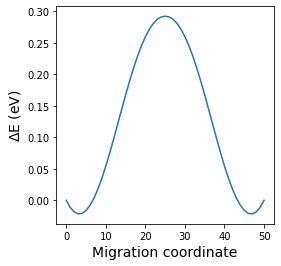

In [12]:
import matplotlib.pyplot as plt

x = list(range(0,51))
y = []


for i in range(0, 51):
    try:
        y.append(energy[f'{i}.out'] - energy['0.out'])
    except:
        pass
    
plt.plot(x, y)
plt.xlabel('Migration coordinate', size =14)
plt.ylabel('$\mathrm{\Delta}$E (eV)', size=14)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

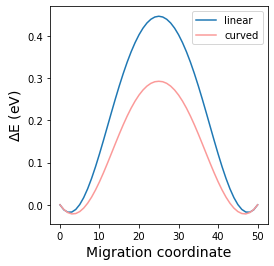

In [4]:

import matplotlib.pyplot as plt
from matplotlib import cm
col = cm.get_cmap('Paired')

straight = [0.0, -0.011902799999999658, -0.017555449999999695, -0.017125829999999453, -0.010961389999999405, 0.0005598200000003217, 0.01699621000000029, 0.03781435000000055, 0.062466689999999936, 0.09025305000000028, 0.12049354000000001, 0.15238359000000035, 0.1851570699999998, 0.21802762999999992, 0.2502727500000006, 0.2812882600000002, 0.3104907600000004, 0.33752782000000003, 0.36201855000000016, 0.38373861, 0.40245830000000016, 0.4180135500000004, 0.43026105000000037, 0.43909420000000043, 0.44443741999999986, 0.44622351000000027, 0.44443741999999986, 0.43909420000000043, 0.43026105000000037, 0.4180135500000004, 0.40245830000000016, 0.38373861, 0.36201855000000016, 0.33752782000000003, 0.3104907600000004, 0.2812882600000002, 0.2502727500000006, 0.21802762999999992, 0.1851570699999998, 0.15238359000000035, 0.12049354000000001, 0.09025305000000028, 0.062466689999999936, 0.03781435000000055, 0.01699621000000029, 0.0005598200000003217, -0.010961389999999405, -0.017125829999999453, -0.017555449999999695, -0.011902799999999658, 0.0]
curve = [0.0, -0.011350769999999955, -0.018522579999999955, -0.021564919999999432, -0.020666030000000113, -0.01600838999999965, -0.007806869999999577, 0.003672780000000486, 0.01814081000000023, 0.03524163999999974, 0.05456014000000042, 0.0756794799999998, 0.09806668000000052, 0.12119558000000019, 0.14449161000000021, 0.16739198000000055, 0.18936768000000015, 0.20995044000000007, 0.22873345, 0.24542119000000007, 0.25978162000000005, 0.2716421699999998, 0.2808888000000005, 0.28744853999999975, 0.2912565900000006, 0.2923156200000001, 0.2912565900000006, 0.28744853999999975, 0.2808888000000005, 0.2716421699999998, 0.25978162000000005, 0.24542119000000007, 0.22873345, 0.20995044000000007, 0.18936768000000015, 0.16739198000000055, 0.14449161000000021, 0.12119558000000019, 0.09806668000000052, 0.0756794799999998, 0.05456014000000042, 0.03524163999999974, 0.01814081000000023, 0.003672780000000486, -0.007806869999999577, -0.01600838999999965, -0.020666030000000113, -0.021564919999999432, -0.018522579999999955, -0.011350769999999955, 0.0]

x = list(range(0,51))

plt.plot(x, straight, color=col(1))
plt.plot(x, curve, color=col(4))
plt.xlabel('Migration coordinate', size =14)
plt.ylabel('$\mathrm{\Delta}$E (eV)', size=14)
plt.legend(('linear', 'curved'))

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('/home/ben/Documents/na3ocl_project/migration.jpg', bbox_inches='tight', dpi=500)